#**Predicting Diabetes and Health Risk Factors Using Random Forest Classifier on Genetic, Lifestyle, and Health Data**

**MEMBER OF THE GROUP** : <BR>
ALFAIZZ DYANDARA ARDIN (41523010176)
<br> AMANDA PUSPITA SARI (41523010047)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CHECK DATA

In [ ]:
# Re-load the dataset to check for missing values, duplicates, and potential issues for cleaning
import pandas as pd

file_path = '/content/drive/My Drive/diabetes_dataset00.csv'
data = pd.read_csv(file_path)

# Checking the basic info of the dataset
data_info = data.info()

# Checking for missing values
missing_values = data.isnull().sum()

# Checking for duplicates
duplicate_rows = data.duplicated().sum()


# Display the basic info, missing values, and duplicate counts
data_info, missing_values, duplicate_rows



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

(None,
 Target                           0
 Genetic Markers                  0
 Autoantibodies                   0
 Family History                   0
 Environmental Factors            0
 Insulin Levels                   0
 Age                              0
 BMI                              0
 Physical Activity                0
 Dietary Habits                   0
 Blood Pressure                   0
 Cholesterol Levels               0
 Waist Circumference              0
 Blood Glucose Levels             0
 Ethnicity                        0
 Socioeconomic Factors            0
 Smoking Status                   0
 Alcohol Consumption              0
 Glucose Tolerance Test           0
 History of PCOS                  0
 Previous Gestational Diabetes    0
 Pregnancy History                0
 Weight Gain During Pregnancy     0
 Pancreatic Health                0
 Pulmonary Function               0
 Cystic Fibrosis Diagnosis        0
 Steroid Use History              0
 Genetic Testing     

# **DATA DESCRIPTION**

In [ ]:
# Make a copy of the dataset
df = data.copy()

# Basic description of the dataset with visual enhancements
def describe_data_visualized(df):
    # 1. Numerical Data Description
    print("\nNumerical Data Description:")
    # Format numbers to 2 decimal places and apply background gradient
    styled_description = df.describe().style.format(precision=2).background_gradient(cmap='viridis')
    display(styled_description)  # Display as a styled dataframe for better readability

    # 2. Categorical Data Description
    print("\nCategorical Data Description:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    if not categorical_columns.empty:
        # Format and style categorical data
        styled_cat_description = df[categorical_columns].describe().style.format(precision=2).background_gradient(cmap='coolwarm')
        display(styled_cat_description)  # Styled categorical description
    else:
        print("No categorical columns found in the dataset.")

# Call the enhanced function
describe_data_visualized(df)


Numerical Data Description:


,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,21.61,32.02,24.78,111.34,194.87,35.05,160.70,15.50,47.56,70.26,1.80,46.42,3097.06
std,10.79,21.04,6.01,19.94,44.53,6.80,48.17,9.63,19.98,11.97,0.68,19.39,713.84
min,5.00,0.00,12.00,60.00,100.00,20.00,80.00,0.00,10.00,30.00,1.00,10.00,1500.00
25%,13.00,14.00,20.00,99.00,163.00,30.00,121.00,7.00,32.00,63.00,1.00,31.00,2629.00
50%,19.00,31.00,25.00,113.00,191.00,34.00,152.00,16.00,46.00,72.00,2.00,48.00,3103.00
75%,28.00,49.00,29.00,125.00,225.00,39.00,194.00,22.00,64.00,79.00,2.00,61.00,3656.25
max,49.00,79.00,39.00,149.00,299.00,54.00,299.00,39.00,99.00,89.00,3.00,99.00,4499.00



Categorical Data Description:


,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Ethnicity,Socioeconomic Factors,Smoking Status,Alcohol Consumption,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000
unique,13,2,2,2,2,3,2,2,3,2,3,2,2,2,2,2,2,2,2,4,2
top,MODY,Positive,Negative,Yes,Absent,Moderate,Healthy,Low Risk,Medium,Smoker,Low,Abnormal,No,Yes,Normal,No,No,Positive,Normal,Protein Present,No
freq,5553,35101,35058,35168,35088,23427,35020,35018,23413,35045,23411,35278,35101,35035,35270,35135,35142,35315,35019,17628,35059


## **ENCODING CATEGORICAL DATA**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

# Label Encoding Process with Output
def encode_categorical_data(df):
    # Identify categorical columns for encoding
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("Categorical Columns Detected:", list(categorical_cols))  # Debugging: Print detected categorical columns

    # Apply Label Encoding to all categorical columns
    label_encoders = {}
    encoding_information = {}

    for col in categorical_cols:
        print(f"\nProcessing column: {col}")  # Debugging: Show which column is being processed
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Encode each categorical column
        label_encoders[col] = le  # Store the encoder for potential reverse transformation

        # Store the mapping of encoded values to original categories
        encoding_information[col] = {encoded: original for encoded, original in zip(le.transform(le.classes_), le.classes_)}
        print(f"Encoding for '{col}': {encoding_information[col]}")  # Debugging: Print mapping for the column

    return df, encoding_information

df = data.copy()

# 2. Encode categorical data and show the encoding information
df_encoded, encoding_info = encode_categorical_data(df)

# 3. Display the first few rows of the encoded dataset
print("\nEncoded Dataset:")
display(df_encoded.head())

# 4. Display the encoding information in a more structured way
if encoding_info:
    print("\nEncoding Information for Categorical Data:")
    for col, mapping in encoding_info.items():
        print(f"\nColumn '{col}':")
        for encoded, original in mapping.items():
            print(f"  {encoded} = {original}")
else:
    print("\nNo categorical columns were encoded.")

Categorical Columns Detected: ['Target', 'Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors', 'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms']

Processing column: Target
Encoding for 'Target': {0: 'Cystic Fibrosis-Related Diabetes (CFRD)', 1: 'Gestational Diabetes', 2: 'LADA', 3: 'MODY', 4: 'Neonatal Diabetes Mellitus (NDM)', 5: 'Prediabetic', 6: 'Secondary Diabetes', 7: 'Steroid-Induced Diabetes', 8: 'Type 1 Diabetes', 9: 'Type 2 Diabetes', 10: 'Type 3c Diabetes (Pancreatogenic Diabetes)', 11: 'Wolcott-Rallison Syndrome', 12: 'Wolfram Syndrome'}

Processing column: Genetic Markers
Encoding for 'Genetic Markers': {0: 'Negative', 1: 'Positive'}

Processing column: 

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,1,0,0,1,40,44,38,0,0,...,76,0,0,1,3,1,56,1,2629,0
1,4,1,0,0,1,13,1,17,0,0,...,60,1,0,0,1,1,28,0,1881,1
2,5,1,1,1,1,27,36,24,0,1,...,80,1,0,0,1,0,55,1,3622,1
3,8,0,1,0,1,8,7,16,1,1,...,89,1,0,1,2,0,60,1,3542,0
4,12,0,0,1,1,17,10,17,0,0,...,41,0,0,1,1,1,24,3,1770,0



Encoding Information for Categorical Data:

Column 'Target':
  0 = Cystic Fibrosis-Related Diabetes (CFRD)
  1 = Gestational Diabetes
  2 = LADA
  3 = MODY
  4 = Neonatal Diabetes Mellitus (NDM)
  5 = Prediabetic
  6 = Secondary Diabetes
  7 = Steroid-Induced Diabetes
  8 = Type 1 Diabetes
  9 = Type 2 Diabetes
  10 = Type 3c Diabetes (Pancreatogenic Diabetes)
  11 = Wolcott-Rallison Syndrome
  12 = Wolfram Syndrome

Column 'Genetic Markers':
  0 = Negative
  1 = Positive

Column 'Autoantibodies':
  0 = Negative
  1 = Positive

Column 'Family History':
  0 = No
  1 = Yes

Column 'Environmental Factors':
  0 = Absent
  1 = Present

Column 'Physical Activity':
  0 = High
  1 = Low
  2 = Moderate

Column 'Dietary Habits':
  0 = Healthy
  1 = Unhealthy

Column 'Ethnicity':
  0 = High Risk
  1 = Low Risk

Column 'Socioeconomic Factors':
  0 = High
  1 = Low
  2 = Medium

Column 'Smoking Status':
  0 = Non-Smoker
  1 = Smoker

Column 'Alcohol Consumption':
  0 = High
  1 = Low
  2 = Moderat

# **DATA PRE-PROCESSING**

## SPLIT TRAIN DATA AND SCALED NUMERICAL DATA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Target'])  # Feature matrix
y = df['Target']  # Target variable

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Scaling the numerical variables using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data (only numerical columns) and transform both train and test sets
numerical_cols = X.select_dtypes(include=['number']).columns  # Numerical columns only
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the scaled train and test datasets
print("\nShape of Scaled Training Data:", X_train.shape)
print("Shape of Scaled Testing Data:", X_test.shape)
print("\nScaled Training Data:")
print(X_train.head())
print("\nScaled Testing Data:")
print(X_test.head())


Shape of Scaled Training Data: (49000, 33)
Shape of Scaled Testing Data: (21000, 33)

Scaled Training Data:
       Genetic Markers  Autoantibodies  Family History  Environmental Factors  \
68681         0.996862        1.000041       -1.009267              -0.999225   
19961        -1.003148       -0.999959       -1.009267               1.000776   
11040         0.996862       -0.999959        0.990818               1.000776   
27673        -1.003148        1.000041       -1.009267              -0.999225   
22876         0.996862        1.000041       -1.009267              -0.999225   

       Insulin Levels       Age       BMI  Physical Activity  Dietary Habits  \
68681        0.225054 -0.092896  0.535850          -0.008053        0.999062   
19961       -1.353173 -1.514588 -1.618507          -0.008053        0.999062   
11040        0.503564  1.660525  1.198729          -0.008053        0.999062   
27673        0.596401  1.992253  1.198729           1.217382        0.999062   
2287

## Class Imbalance Check

Class Distribution (%):
Target
3     7.932857
6     7.827143
0     7.805714
8     7.780000
4     7.725714
11    7.714286
9     7.710000
5     7.680000
1     7.634286
10    7.600000
12    7.592857
7     7.535714
2     7.461429
Name: proportion, dtype: float64


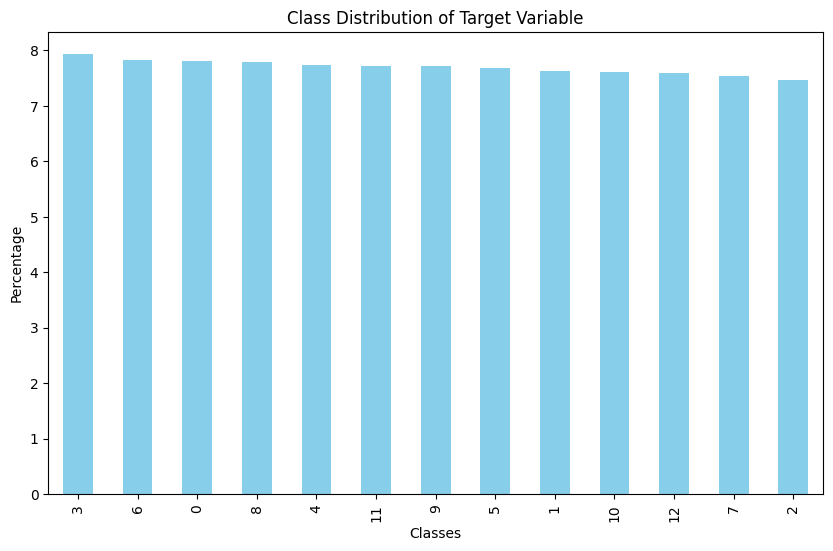

In [ ]:
# Check the distribution of the target variable (class imbalance check)
class_distribution = y.value_counts(normalize=True) * 100

# Display the distribution of classes in the target variable
print("Class Distribution (%):")
print(class_distribution)

import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

# **DATA CONSTRUCTION**

## RANDOM FOREST FEATURE IMPORTANCE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importances)

# Optional: Drop low-importance features (e.g., keep only features with importance > 0.01)
important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Display the selected features
print("Selected Features:", important_features)

                          Feature  Importance
5                             Age    0.142905
12           Blood Glucose Levels    0.129512
9                  Blood Pressure    0.085865
21   Weight Gain During Pregnancy    0.081177
6                             BMI    0.078125
29        Digestive Enzyme Levels    0.076328
11            Waist Circumference    0.070750
4                  Insulin Levels    0.065200
10             Cholesterol Levels    0.057614
23             Pulmonary Function    0.053283
31                   Birth Weight    0.044452
22              Pancreatic Health    0.033232
27       Neurological Assessments    0.016718
30                     Urine Test    0.005909
7               Physical Activity    0.004698
16            Alcohol Consumption    0.004653
14          Socioeconomic Factors    0.004617
25            Steroid Use History    0.002882
1                  Autoantibodies    0.002874
24      Cystic Fibrosis Diagnosis    0.002847
2                  Family History 

CORRELATION OF SELECTED FEATURES

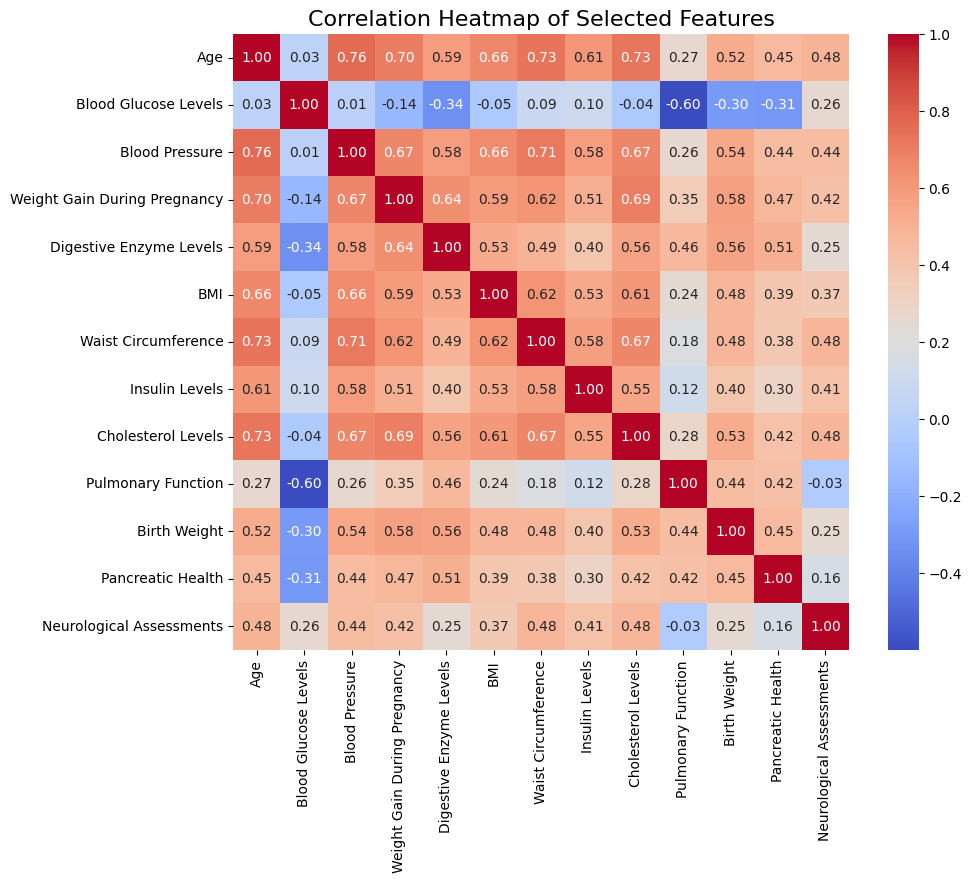

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the selected features
correlation_matrix = X_train_selected.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
plt.show()

## DISPLAY SHAPE OF SELECTED FEATURE

In [ ]:
# Display the shapes of X_train_selected and X_test_selected to confirm data construction
print(f"Selected Training Features Shape: {X_train_selected.shape}")
print(f"Selected Testing Features Shape: {X_test_selected.shape}")

# Display the shapes of y_train and y_test to confirm they align with the feature matrices
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Selected Training Features Shape: (49000, 13)
Selected Testing Features Shape: (21000, 13)
Training Labels Shape: (49000,)
Testing Labels Shape: (21000,)


#MODEL BUILDING AND TRAINING

Steps for Model Building:
1. Train the Model:
Use the Random Forest classifier to train on the training set. <br>
2. Evaluate the Model:
 Evaluate the model on the test set to assess performance (accuracy, precision, recall, etc.).

In [ ]:
# Import necessary libraries for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Check feature importance
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)


Model Accuracy: 0.9004
Random Forest Classifier Accuracy: 90.04%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1610
           1       0.89      0.92      0.90      1587
           2       0.95      0.94      0.94      1608
           3       0.96      0.85      0.90      1756
           4       1.00      1.00      1.00      1547
           5       0.97      1.00      0.98      1614
           6       0.79      0.77      0.78      1621
           7       0.82      0.81      0.82      1609
           8       0.86      1.00      0.92      1691
           9       0.90      0.70      0.79      1607
          10       0.80      1.00      0.89      1605
          11       0.97      0.86      0.91      1588
          12       0.87      0.97      0.92      1557

    accuracy                           0.90     21000
   macro avg       0.90      0.90      0.90     21000
weighted avg       0.90      0.90      0.90  

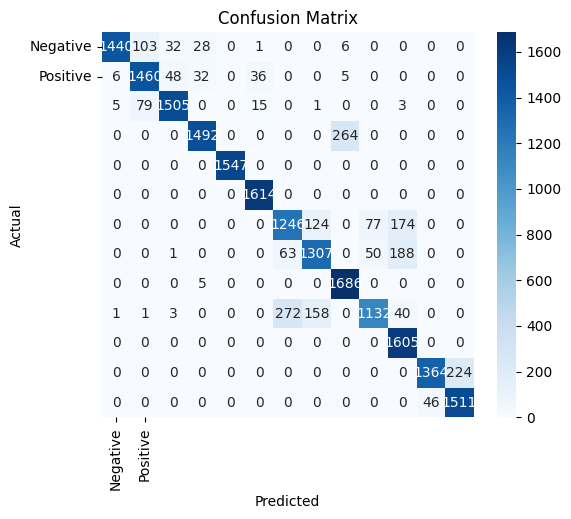

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-13-1b45d3a508d0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


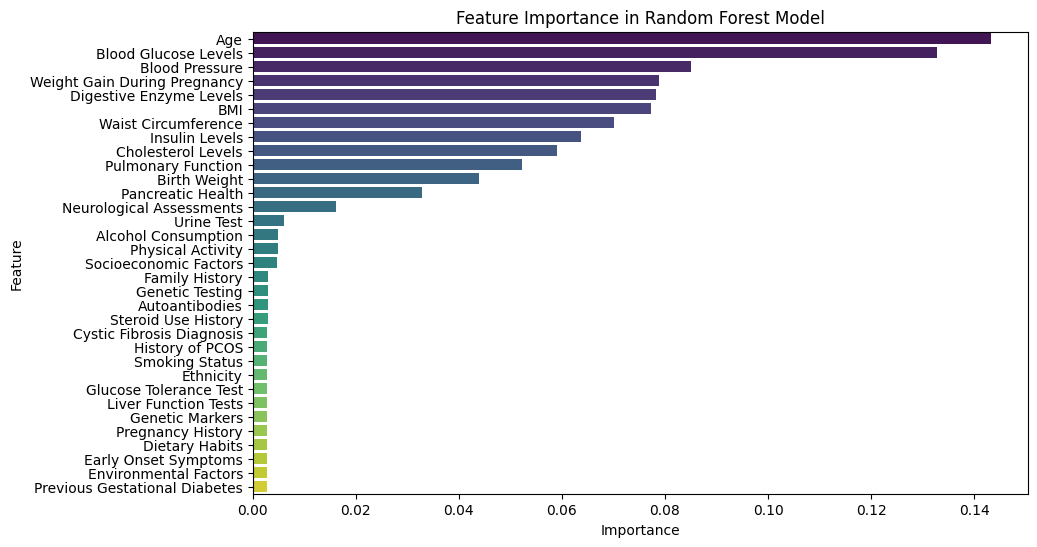

In [ ]:
import pandas as pd

# Get the feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for easier plotting
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid without 'auto'
param_grid = {
    'n_estimators': [100, 150, 200, 250],  # Example range for n_estimators
    'max_depth': [None, 10, 20, 30],        # Example range for max_depth
    'min_samples_split': [2, 5, 10],        # Example range for min_samples_split
    'min_samples_leaf': [1, 2, 4],          # Example range for min_samples_leaf
    'max_features': ['sqrt', 'log2', 10]    # Valid options for max_features (integer or str)
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to search over the grid
random_search = RandomizedSearchCV(rf, param_distributions=param_grid,
                                   n_iter=100, cv=5, random_state=42,
                                   n_jobs=-1, verbose=2)

# Fit the model on your training data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model with the best parameters on the test data
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after RandomizedSearchCV: {accuracy:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 20}
Model Accuracy after RandomizedSearchCV: 0.9029


# **MODEL SELECTION**

## EVALUATE MODELS

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1070
           1       0.89      0.94      0.91      1072
           2       0.97      0.93      0.95      1072
           3       0.97      0.84      0.90      1194
           4       1.00      1.00      1.00      1018
           5       0.97      1.00      0.99      1089
           6       0.79      0.77      0.78      1053
           7       0.79      0.85      0.82      1048
           8       0.85      1.00      0.92      1123
           9       0.95      0.66      0.78      1083
          10       0.80      1.00      0.89      1064
          11       1.00      0.84      0.91      1063
          12       0.86      1.00      0.92      1051

    accuracy                           0.90     14000
   macro avg       0.91      0.90      0.90     14000
weighted avg       0.91      0.90      0.90     14000

Confusion Matrix:
[[ 972   64   16   15    0    0    0 

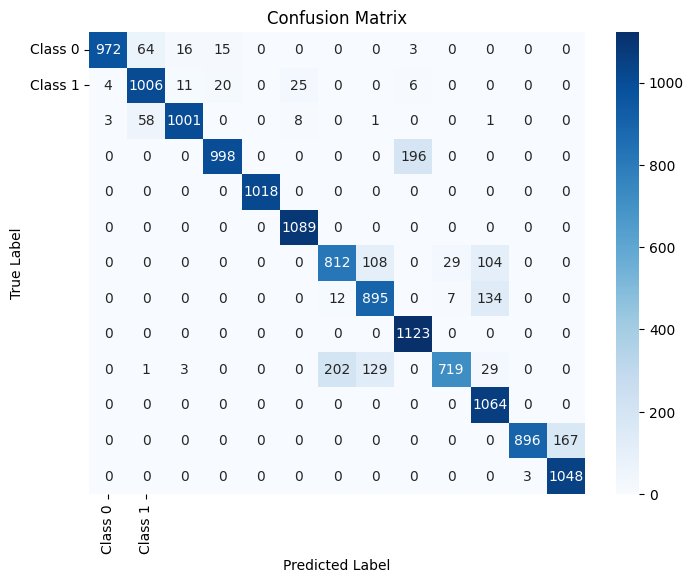

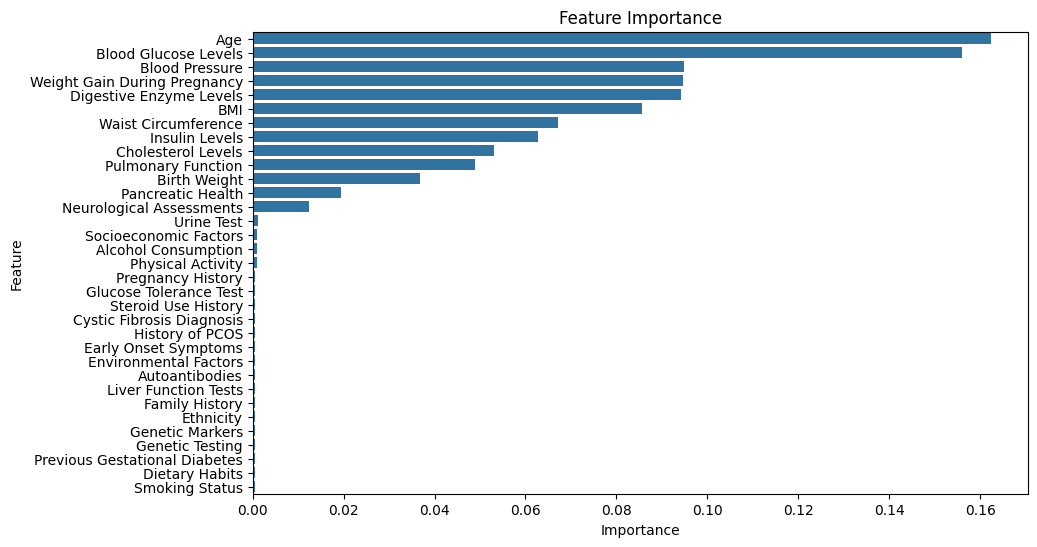

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

param_grid = {
    'n_estimators': [100, 150, 200, 250],  # Example range for n_estimators
    'max_depth': [None, 10, 20, 30],        # Example range for max_depth
    'min_samples_split': [2, 5, 10],        # Example range for min_samples_split
    'min_samples_leaf': [1, 2, 4],          # Example range for min_samples_leaf
    'max_features': ['sqrt', 'log2', 10]    # Valid options for max_features (integer or str)
}
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_grid,
                                   n_iter=100, cv=5, random_state=42,
                                   n_jobs=-1, verbose=2)
# Fit the model on your training data
random_search.fit(X_train, y_train)

best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
# Plot Feature Importances
importances = best_rf_model.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame with column names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


## Use Cross-Validation for Stability

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy: 0.9023


RANDOM FOREST TREE

Confusion Matrix:
[[ 972   64   16   15    0    0    0    0    3    0    0    0    0]
 [   4 1006   11   20    0   25    0    0    6    0    0    0    0]
 [   3   58 1001    0    0    8    0    1    0    0    1    0    0]
 [   0    0    0  998    0    0    0    0  196    0    0    0    0]
 [   0    0    0    0 1018    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1089    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  812  108    0   29  104    0    0]
 [   0    0    0    0    0    0   12  895    0    7  134    0    0]
 [   0    0    0    0    0    0    0    0 1123    0    0    0    0]
 [   0    1    3    0    0    0  202  129    0  719   29    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1064    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  896  167]
 [   0    0    0    0    0    0    0    0    0    0    0    3 1048]]
Classification Report:
              precision    recall  f1-score   support

           0       

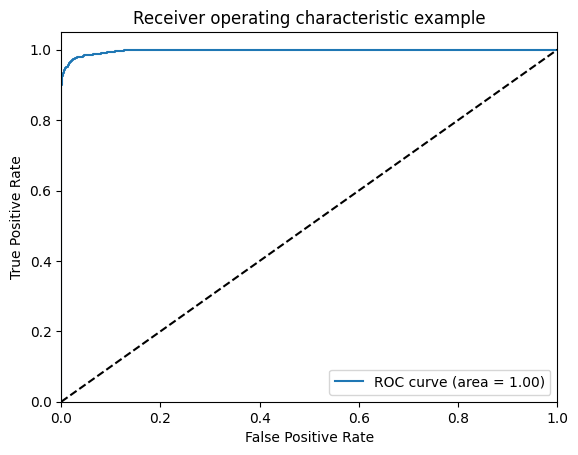

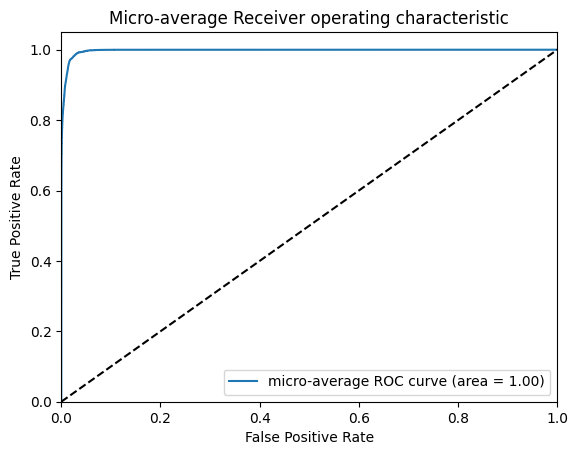

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.show()

## ANALYZE OVERFITTING

Random Forest - Train Accuracy: 95.31%, Test Accuracy: 90.29%


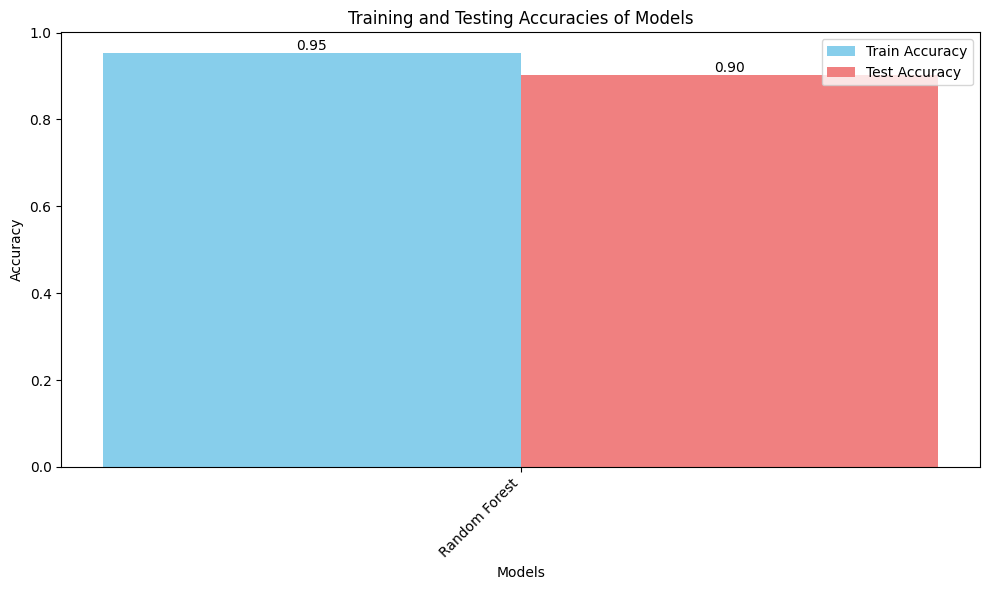

In [ ]:
# Check for overfitting by comparing training and testing accuracy
for name, model in models.items():
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"{name} - Train Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%")

#MODEL OPTIMIZATION <br>



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples to form a leaf
    'max_features': ['sqrt', 'log2', None] # Number of features to consider for the best split
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the model using the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions using the tuned model
y_pred_tuned = best_rf.predict(X_test)

# Display the best parameters and the best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {grid_search.best_score_:.4f}")
